# Excercises Electric Machinery Fundamentals
## Chapter 8

## Problem 8-1 to Problem 8-9

In [1]:
%pylab notebook
%precision %.4g

Populating the interactive namespace from numpy and matplotlib


### Description

Problems 8-1 to 8-12 refer to the following dc motor:

| .                            | .                                          |
|------------------------------|--------------------------------------------|
| $P_\text{rated} = 30\,hp$    | $I_\text{L,rated} = 110\,A$                |
| $V_T = 240\,V$               | $n_\text{rated} = 1800\,r/min$             |
| $R_A = 0.19\,\Omega$         | $R_S = 0.02\,\Omega$                       |
| $N_F = 2700 \text{turns per pole}$ | $N_{SE} = 14 \text{ turns per pole}$ |
| $R_F = 75\,\Omega$           | $R_\text{adj} = 100\text{ to }400\,\Omega$ |

Rotational losses = 3550 W at full load.

Magnetization curve as shown in Figure P8-1:

<img src="figs/FigC_P8-1.jpg" width="70%">

<hr>
**Note:**
An electronic version of this magnetization curve can be found in file
[p81_mag.dat](data/p81_mag.dat), which can be used with Python programs. Column 1
contains field current in amps, and column 2 contains the internal generated
voltage $E_A$ in volts.
<hr>

In Problems 8-1 through 8-7, assume that the motor described above can be connected in shunt. 
The equivalent circuit of the shunt motor is shown in Figure P8-2.

<img src="figs/FigC_P8-2.jpg" width="70%">

In [2]:
P_rated =   30    # [hp]
Il_rated = 110    # [A]
Vt =       240    # [V]
Nf =      2700
n_0     = 1800    # [r/min]
Nse =       14
Ra =         0.19 # [Ohm]
Rf =        75    # [Ohm]
Rs =         0.02 # [Ohm]
Radj_max = 400    # [Ohm]
Radj_min = 100    # [Ohm]

## Problem 8-1

### Description

If the resistor $R_\text{adj}$ is adjusted to $175\,\Omega$

 * What is the rotational speed of the motor at no-load conditions?

### SOLUTION

At no-load conditions, $E_A = V_T = 240 V$ . The field current is given by:

$$I_F = \frac{V_T}{R_\text{adj}+R_F}$$

In [3]:
Radj_1 = 175 # [Ohm]
If_1 = Vt / (Radj_1+Rf)
If_1 # [A]

0.96

From Figure P8-1, this field current would produce an internal generated voltage $E_{A_0}$ of 241 V at a speed $n_0$ of 1800 r/min. Therefore, the speed n with a voltage $E_A$ of 240 V would be:

$$\frac{E_A}{E_{A_0}} = \frac{n}{n_0}$$

In [4]:
Ea0 = 241.0 # [V]
Ea_1 = 240.0 # [V]
n_1 = Ea_1 / Ea0 * n_0
print('''
n_1 = {:.1f} r/min
=================='''.format(n_1))


n_1 = 1792.5 r/min


## Problem 8-2

### Description

Assuming no armature reaction

 * What is the speed of the motor at full load? 
 * What is the speed regulation of the motor?

### SOLUTION

At full load, the armature current is:

$$I_A = I_L - I_F = I_L - \frac{V_T}{R_\text{adj}+R_F}$$

In [5]:
Radj_2 = Radj_1
Ia = Il_rated - Vt/(Radj_2 + Rf)
Ia # [A]

109

The internal generated voltage $E_A$ is:

$$E_A = V_T - I_A R_A$$

In [6]:
Ea_2 = Vt - Ia*Ra
Ea_2 # [V]

219.3

Volts. The field current is the same as before, and there is no armature reaction, so $E_{A_0}$ is still 241 V at a speed $n_0$ of 1800 r/min. Therefore,

In [7]:
n_2 = Ea_2 / Ea0 * n_0
n_2  # [rpm]

1638

rpm. The speed regulation is:

$$SR = \frac{n_\text{nl}-n_\text{fl}}{n_\text{fl}}$$

In [8]:
SR = (n_1 - n_2) / n_2
print('''
SR = {:.1f} %
=========='''.format(SR*100))


SR = 9.4 %


## Problem 8-3

### Description

If the motor is operating at full load and if its variable resistance $R_\text{adj}$ is increased to $250\,\Omega$, 

* What is the new speed of the motor? 
* Compare the full-load speed of the motor with $R_\text{adj} = 175\,\Omega$ to the full-load speed with $R_\text{adj} = 250\,\Omega$. (Assume no armature reaction, as in the previous problem.)

### SOLUTION

If $R_\text{adj}$ is set to $250\,\Omega$, the field current is now:

In [9]:
Radj_3 = 250 # [Ohm]
If_3 = Vt / (Radj_3+Rf)
If_3

0.7385

Since the motor is still at full load, $E_A$ is still

In [10]:
Ea_2

219.3

V. From the magnetization curve (Figure P8-1), the new field current $I_F$ would produce a voltage $E_{A_0}$ of 212 V at a speed:

In [11]:
n_0

1800

r/min.

In [12]:
Ea_3 = Ea_2
Ea0_3 = 212.0 # [V]
n_3 = (Ea_3 / Ea0_3) * n_0
print('''
n_3 = {:.0f} r/min
================'''.format(n_3))


n_3 = 1862 r/min


Note that $R_\text{adj}$ has increased, and as a result the speed of the motor $n$ increased.

## Problem 8-4

### Description

Assume that the motor is operating at full load and that the variable resistor $R_\text{adj}$ is again $175\,\Omega$ . 

If the armature reaction is $1000\, A\cdot t$ at full load,

* What is the speed of the motor? 
* How does it compare to the result for [Problem 8-2](#Problem-8-2)?

In [13]:
Radj_4 = 175.0 # [Ohm]
AR_4   = 1e3   # [A*turns]

### SOLUTION

The field current is again 0.96 A, and the motor is again at full load conditions. However, this
time there is an armature reaction of $1200 A \cdot turns$, and the effective field current is:

$$I_F^* = I_F - \frac{AR}{N_F}$$

In [14]:
If_4 = If_1
If_4_ = If_4 - AR_4/Nf
If_4_ # [A]

0.5896

From Figure P8-1, this field current would produce an internal generated voltage $E_{A0}$ of 185 V at a speed $n_0$ of

In [15]:
n_0

1800

r/min. The actual internal generated voltage $E_A$ at these conditions is:

$$E_A = V_T - I_A R_A$$

In [16]:
Eao_4 = 185.0 # [r/min]
Ea_4 = Vt - Ia*Ra
Ea_4 # [V]

219.3

Therefore, the speed n with a voltage of 240 V would be:

In [17]:
n_4 = (Ea_4 / Eao_4) * n_0
print('''
n_4 = {:.1f} r/min
=================='''.format(n_4))


n_4 = 2133.6 r/min


If all other conditions are the same, the motor with armature reaction runs at a higher speed than the motor
without armature reaction.

## Problem 8-5

### Description

If $R_\text{adj}$ can be adjusted from 100 to 400 $\Omega$ 

* What are the maximum and minimum no-load speeds possible with this motor?

In [18]:
Radj_5_min = 100 # [Ohm]
Radj_5_max = 400 # [Ohm]

### SOLUTION

The minimum speed will occur when $R_\text{adj} = 100 \Omega$ , and the maximum speed will occur when $R_\text{adj} = 400 \Omega$ . The field current when $R_\text{adj} = 100 \Omega$ is:

In [19]:
If_5_max = Vt / (Radj_5_min + Rf)
If_5_max # [A]

1.371

From Figure P8-1, this field current would produce an internal generated voltage $E_{A0}$ of 271.5 V at a speed 

In [20]:
n_0

1800

r/min. Therefore, the speed n with a voltage of

In [21]:
Vt

240

Volts would be:

In [22]:
Eao_5_max = 271.5 # [V]
n_5_min = (Vt/Eao_5_max)*n_0
print('''
n_5_min = {:.1f} r/min
======================'''.format(n_5_min))


n_5_min = 1591.2 r/min


The field current when $R_\text{adj} = 400\,\Omega$ is:

In [23]:
If_5_min = Vt / (Radj_5_max + Rf)
If_5_min # [A]

0.5053

From Figure P8-1, this field current would produce an internal generated voltage $E_{A_0}$ of 167 V at a speed 

In [24]:
n_0

1800

r/min. Therefore, the speed n with a voltage of

In [25]:
Vt

240

Volts would be:

In [26]:
Eao_5_min = 167.0 # [V]
n_5_max = (Vt/Eao_5_min)*n_0
print('''
n_5_max = {:.1f} r/min
======================'''.format(n_5_max))


n_5_max = 2586.8 r/min


## Problem 8-6

### Description

 * What is the starting current of this machine if it is started by connecting it directly to the power supply $V_T$ ?
 * How does this starting current compare to the full-load current of the motor?

### SOLUTION

The starting current of this machine (ignoring the small field current) is:

In [27]:
Il_start_6 = Vt / Ra
print('''
Il_start_6 = {:.1f} A
====================='''.format(Il_start_6))


Il_start_6 = 1263.2 A


The rated current is 

In [28]:
Il_rated

110

Amperes, so the starting current is

In [29]:
Il_start_6/Il_rated

11.48

times greater than the full-load current. **This much current is extremely likely to damage the motor.**

## Problem 8-7

### Description

Plot the torque-speed characteristic of this motor assuming no armature reaction, and again assuming a full-load armature reaction of $1200\, A \cdot turns$. (Assume that the armature reaction increases linearly with increases in armature current.)

### SOLUTION

This problem is best solved with a script, since it involves calculating the torque-speed
values at many points. 

Get the magnetization curve. Note that this curve is defined for a speed of 1200 r/min.

In [30]:
# Load the magnetization curve data
import pandas as pd
# The data file is stored in the repository
fileUrl = 'data/p81_mag.dat'
data = pd.read_csv(fileUrl,     # the address where to download the datafile from
                   sep=' ',     # our data source uses a blank space as separation
                   comment='%', # ignore lines starting with a "%" 
                   skipinitialspace = True,  # ignore intital spaces
                   header=None, # we don't have a header line defined...
                   names=['If_values', 'Ea_values'] # ...instead we define the names here
                   )

First, initialize the values needed in this program.

In [31]:
Radj_7 = 175.0 # [Ohm]
Il_7 = linspace(0,110,111)
f_ar0 = 1000.0 # [At/m]

Calculate the armature current for each load

In [32]:
Ia_7 = Il_7 - Vt / (Rf + Radj_7)

Now calculate the internal generated voltage for each armature current.

In [33]:
Ea_7 = Vt - Ia_7*Ra

Calculate the armature reaction MMF for each armature current.

In [34]:
f_ar_7 = (Ia_7 / 55) * f_ar0

Calculate the effective field current with and without armature reaction. Ther term If_ar is the field current with armature reaction, and the term If_noar is the field current without armature reaction.

In [35]:
If_ar = Vt / (Rf + Radj_7) - f_ar_7 / Nf;
If_noar = Vt / (Rf + Radj_7);

Calculate the resulting internal generated voltage at $n_0$ by interpolating the motor's magnetization curve.

In [36]:
Ea0_ar_7 = interp(If_ar, data['If_values'], data['Ea_values'])
Ea0_noar_7 = interp(If_noar, data['If_values'], data['Ea_values'])

Calculate the resulting speed from Equation (8-13)

In [37]:
n_ar_7 = ( Ea_7 / Ea0_ar_7 ) * n_0
n_noar_7 = ( Ea_7 / Ea0_noar_7 ) * n_0

Calculate the induced torque corresponding to each speed from Equation (8-10).

In [38]:
tau_ind_ar_7 = Ea_7 * Ia_7 / (n_ar_7 * 2 * pi / 60);
tau_ind_noar_7 = Ea_7 * Ia_7 / (n_noar_7 * 2 * pi / 60);

Plot the torque-speed curves

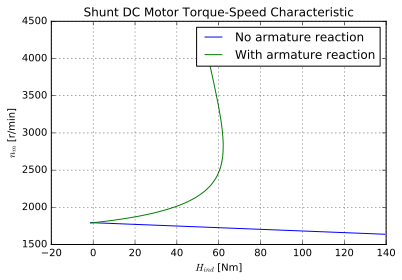

In [39]:
title(r'Shunt DC Motor Torque-Speed Characteristic')
xlabel(r'$\tau_{ind}$ [Nm]')
ylabel(r'$n_m$ [r/min]')
plot(tau_ind_noar_7, n_noar_7, tau_ind_ar_7, n_ar_7)
legend(('No armature reaction', 'With armature reaction'), loc=1)
grid()

<hr>

For Problems 8-8 and 8-9, the shunt dc motor is reconnected separately excited, as shown in Figure P8-3. 

It has a fixed field voltage $V_F$ of 240 V and an armature voltage $V_A$ that can be varied from 120 to 240 V.

<img src="figs/FigC_P8-3.jpg" width="70%">

## Problem 8-8

### Description

What is the no-load speed of this separately excited motor when $R_\text{adj} = 175\, \Omega$ and 

#### (a)
$V_A = 120\,V$

#### (b)
$V_A = 180\,V$

#### (c)
$V_A = 240\,V$

In [40]:
Radj_8 = 175.0 # [Ohm]

### SOLUTION

At no-load conditions, $E_A = V_A$ . The field current is given by:

$$I_F = \frac{V_T}{R_\text{adj}+R_F}$$

In [41]:
If_8 = Vt/ (Radj_8+Rf)
If_8 # [A]

0.96

From Figure P8-1, this field current would produce an internal generated voltage $E_{A0}$ of 241 V at a speed

In [42]:
n_0

1800

r/min. Therefore,

$$\frac{E_A}{E_{A_0}} = \frac{n}{n_0}$$

In [43]:
Ea0_8 = 241.0 # [V]

#### (a)
If $V_A = 120\,V$, then $E_A =\,120 V$

In [44]:
Ea_8_a = 120 # [V]
n_8_a = (Ea_8_a / Ea0_8) *n_0
print('''
n_8_a = {:.1f} r/min
==================='''.format(n_8_a))


n_8_a = 896.3 r/min


#### (b)
If $V_A = 180\,V$, then $E_A = 180\,V$

In [45]:
Ea_8_b = 180 # [V]
n_8_b = (Ea_8_b / Ea0_8) * n_0
print('''
n_8_b = {:.1f} r/min
===================='''.format(n_8_b))


n_8_b = 1344.4 r/min


#### (c)
If $V_A = 240\,V$, then $E_A = 240\,V$

In [46]:
Ea_8_c = 240 # [V]
n_8_c = (Ea_8_c / Ea0_8) * n_0
print('''
n_8_c = {:.1f} r/min
===================='''.format(n_8_c))


n_8_c = 1792.5 r/min


## Problem 8-9

### Description

For the separately excited motor of Problem 8-8:

#### (a)
 * What is the maximum no-load speed attainable by varying both $V_A$ and $R_\text{adj}$ ?
 
#### (b)
 * What is the minimum no-load speed attainable by varying both $V_A$ and $R_\text{adj}$ ?
 
#### (c)
 * What is the motor’s efficiency at rated conditions? 
 
 <hr>
**Note:**

Assume that

(1) the brush voltage drop is 2 V;

(2) the core loss is to e determined at an armature voltage equal to the armature voltage under full load; 

(3) stray load losses are 1 percent of full load.
<hr>

### SOLUTION

#### (a)
The maximum speed will occur with the maximum $V_A$ and the maximum $R_\text{adj}$. The field current for $R_\text{adj} = 400\,\Omega$ is:

In [47]:
Radj_9_a = 400.0 # [Ohm]
If_9_a = Vt / (Radj_9_a+Rf)
If_9_a # [A]

0.5053

From Figure P8-1, this field current would produce an internal generated voltage $E_{A_0}$ of 167 V at a speed 

In [48]:
n_0

1800

r/min. At no-load conditions, the maximum internal generated voltage $E_A = V_A = 240\,V$.
Therefore, the speed $n$ with a voltage of 240 V would be:

In [49]:
Ea_9_a = 240.0 # [V]
Ea0_9_a = 167.0 # [V]
n_9_a = (Ea_9_a / Ea0_9_a) * n_0
print('''
n_9_a = {:.1f} r/min
===================='''.format(n_9_a))


n_9_a = 2586.8 r/min


#### (b)
The minimum speed will occur with the maximum $V_A$ and the maximum $R_\text{adj}$. The field current for $R_\text{adj} = 100 \Omega$ is:

In [50]:
Radj_9_b = 100.0 # [Ohm]
If_9_b = Vt / (Radj_9_b+Rf)
If_9_b # [A]

1.371

From Figure P8-1, this field current would produce an internal generated voltage $E_{Ao}$ of 271 V at a speed

In [51]:
n_0

1800

r/min. At no-load conditions, the maximum internal generated voltage $E_A = V_A = 120\,V$.
Therefore, the speed $n$ with a voltage of 120 V would be:

In [52]:
Ea_9_b = 120.0 # [V]
Ea0_9_b = 271.0 # [V]
n_9_b = (Ea_9_b / Ea0_9_b) * n_0
print('''
n_9_b = {:.1f} r/min
==================='''.format(n_9_b))


n_9_b = 797.0 r/min
